In [128]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
vehdata=pd.read_csv("/content/drive/MyDrive/Imarticus/PGA40/Python/EDA/Car_sales.csv")

In [131]:
# Business Problem :- Sales prediction and the factor affecting the sale
# Data Collection - We have it already

In [132]:
vehdata.shape

(157, 16)

In [133]:
vehdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [134]:
# EDA - categorical Variable - Object

In [135]:
vehdata["Manufacturer"].nunique()

30

In [136]:
vehdata["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [137]:
vehdata["Manufacturer"].value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

<Axes: >

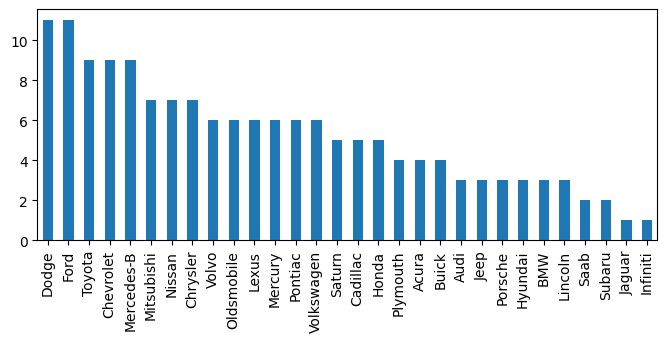

In [138]:
plt.figure(figsize=(8,3))
vehdata["Manufacturer"].value_counts().plot(kind="bar")

In [139]:
# Model/ Vehicle type  - do the same for these variable

In [140]:
vehdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [141]:
vehdata.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,60.220000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.000000,5.200000,5.380000,5.700000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.735000,78.800000,79.190000,79.900000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,4.457840,4.629440,5.090440,5.396680,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.880000,26.000000,29.600000,30.900000,32.000000


In [142]:
# sns.boxplot(data=vehdata, y=vehdata["Sales_in_thousands"])
# plt.show()

In [143]:
# Bivariate Analysis
# Cat-Cat
# num-Num
# cat-Num

In [144]:
vehdata.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [145]:
vehdata.drop(columns=["Model"], inplace=True)

In [146]:
# pd.crosstab(vehdata["Manufacturer"], vehdata["Vehicle_type"])

In [147]:
# check whether Manufacture and Vehicle type are related ?

In [148]:
# Cat-Num
vehdata.groupby(["Manufacturer"]).agg({"Sales_in_thousands":["min", "max", "mean", "count"]})

Sales_in_thousands                           
                            min      max        mean count
Manufacturer                                              
Acura                     8.588   39.384   19.751250     4
Audi                      1.380   20.397   13.519000     3
BMW                       9.231   19.747   15.501667     3
Buick                    27.851   91.561   60.504750     4
Cadillac                  6.536   63.729   22.435600     5
Chevrolet                17.947  145.519   61.596111     9
Chrysler                  7.854   53.480   28.817286     7
Dodge                     0.916  227.061   82.740818    11
Ford                     35.068  540.561  183.875909    11
Honda                    12.855  230.902  118.534800     5
Hyundai                  29.450   66.692   45.775333     3
Infiniti                 23.713   23.713   23.713000     1
Jaguar                   15.467   15.467   15.467000     1
Jeep                     55.557  157.040   97.717667     3
Lexus                     3.334   51.238   17.807167     6
Lincoln                  13.798   48.911   28.544667     3
Mercedes-B                0.954   28.976   13.013889     9
Mercury                  14.351   81.174   39.666500     6
Mitsubishi                0.110   55.616   25.842143     7
Nissan                   27.308   88.094   57.090714     7
Oldsmobile                1.112   80.255   29.831500     6
Plymouth                  1.872   32.734   16.000250     4
Pontiac                  19.911  131.097   61.755667     6
Porsche                   1.280    8.982    4.042667     3
Saab                      9.191   12.115   10.653000     2
Saturn                    5.223   80.620   33.770000     5
Subaru                   33.028   47.107   40.067500     2
Toyota                    9.835  247.994   82.245000     9
Volkswagen                5.596   83.721   34.868667     6
Volvo                     3.493   18.969   12.623333     6

In [149]:
vehdata.groupby(["Vehicle_type"]).agg({"Sales_in_thousands":["min", "max", "mean", "count"]})

Sales_in_thousands                          
                            min      max       mean count
Vehicle_type                                             
Car                       9.126  540.561  80.622293    41
Passenger                 0.110  247.994  43.234345   116

In [150]:
vehdata.groupby(["Vehicle_type"]).agg({"Price_in_thousands":["min", "max", "mean", "count"]})

Price_in_thousands                         
                            min     max       mean count
Vehicle_type                                            
Car                      11.528  60.105  26.319975    40
Passenger                 9.235  85.500  27.763200   115

In [151]:
# Sales_in_thousands:- Manufacturer , Vehicle_type

In [152]:
# Num-Num

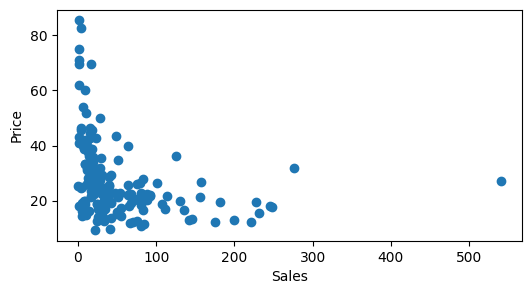

In [153]:
plt.figure(figsize=(6,3))
plt.scatter(vehdata["Sales_in_thousands"], vehdata["Price_in_thousands"])
plt.xlabel("Sales")
plt.ylabel("Price")
plt.show()

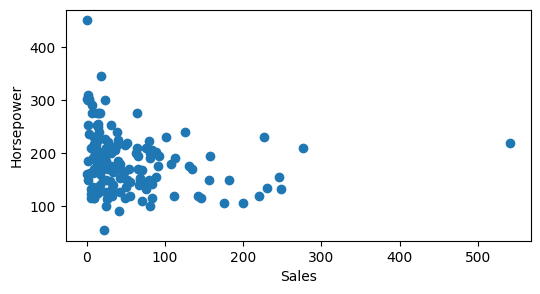

In [154]:
plt.figure(figsize=(6,3))
plt.scatter(vehdata["Sales_in_thousands"], vehdata["Horsepower"])
plt.xlabel("Sales")
plt.ylabel("Horsepower")
plt.show()

In [155]:
vehdata[["Sales_in_thousands", "Price_in_thousands"]].corr()

,Sales_in_thousands,Price_in_thousands
Sales_in_thousands,1.000000,-0.304734
Price_in_thousands,-0.304734,1.000000


In [156]:
vehdata.columns

Index(['Manufacturer', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [157]:
d=vehdata[['Sales_in_thousands', 'four_year_resale_value',
       'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency',  'Power_perf_factor']].corr()
d.to_excel("/content/drive/MyDrive/Imarticus/PGA40/Regression/corrprofile.xlsx")

In [158]:
# Feature Engineering

In [159]:
vehdata.columns

Index(['Manufacturer', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [160]:
vehdata["Latest_Launch"]=pd.to_datetime(vehdata["Latest_Launch"])

In [161]:
from datetime import date
vehdata["age_car"]=date.today().year -vehdata["Latest_Launch"].dt.year

In [162]:
vehdata.drop(columns=["Latest_Launch"], inplace=True)

In [163]:
vehdata["Area_car"]=vehdata["Length"]*vehdata["Width"]

In [164]:
# missing Value treatment

In [165]:
vehdata.isnull().sum()

Manufacturer               0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
age_car                    0
Area_car                   1
dtype: int64

In [166]:
36/157

0.22929936305732485

In [167]:
vehdata.drop(["four_year_resale_value"], axis=1, inplace=True)

In [168]:
vehdata.isnull().sum()

Manufacturer          0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
age_car               0
Area_car              1
dtype: int64

In [169]:
test0=vehdata.dropna()

In [170]:
vehdata.shape

(157, 15)

In [171]:
test0.shape

(152, 15)

In [172]:
5/157

0.03184713375796178

In [173]:
vehdata.dtypes[vehdata.dtypes=="object"].index

Index(['Manufacturer', 'Vehicle_type'], dtype='object')

In [174]:
cat_data=vehdata[vehdata.dtypes[vehdata.dtypes=="object"].index]
num_data=vehdata[vehdata.dtypes[vehdata.dtypes!="object"].index]
# num_data

In [175]:
cat_data.isnull().sum()

Manufacturer    0
Vehicle_type    0
dtype: int64

In [176]:
num_data.isnull().sum()

Sales_in_thousands    0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
age_car               0
Area_car              1
dtype: int64

In [177]:
num_data.fillna(num_data.median(), inplace=True) # Filling median value

<ipython-input-177-5ff66040ce4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.fillna(num_data.median(), inplace=True) # Filling median value


In [178]:
# Outlier Treatment

In [179]:
vehdata.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.000000,5.200000,5.380000,5.700000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.735000,78.800000,79.190000,79.900000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,4.457840,4.629440,5.090440,5.396680,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.880000,26.000000,29.600000,30.900000,32.000000
Fuel_efficiency,154.0,23.844156,4.282706,15.000000,15.00000,15.000000,15.590000,16.000000,16.650000,18.300000,21.000000,24.000000,26.000000,28.700000,31.000000,31.000000,32.410000,33.000000,33.000000,45.000000


In [180]:
vehdata["Sales_in_thousands"].quantile(.99)

260.64531999999997

In [181]:
# vehdata["Sales_in_thousands"]=np.where(vehdata["Sales_in_thousands"]>=260.65,260.65,vehdata["Sales_in_thousands"] )

In [182]:
def outliercapM1(x):
  x=x.clip(upper=x.quantile(.99))
  # x=x.clip(lower=x.quantile(.01))
  return x

In [183]:
num_data=num_data.apply(outliercapM1)

In [184]:
# num_data.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

In [185]:
final_data=pd.concat([cat_data, num_data], axis=1)

In [186]:
# Convert non numerical columns to numerical  (Dummy creation)

In [187]:
final_data0=pd.get_dummies(final_data, columns=["Manufacturer", "Vehicle_type"], drop_first=True, dtype=int)

In [188]:
# final_data0.columns

In [189]:
# Assumptions

In [190]:
cor=final_data0[['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor', 'age_car', 'Area_car']].corr()

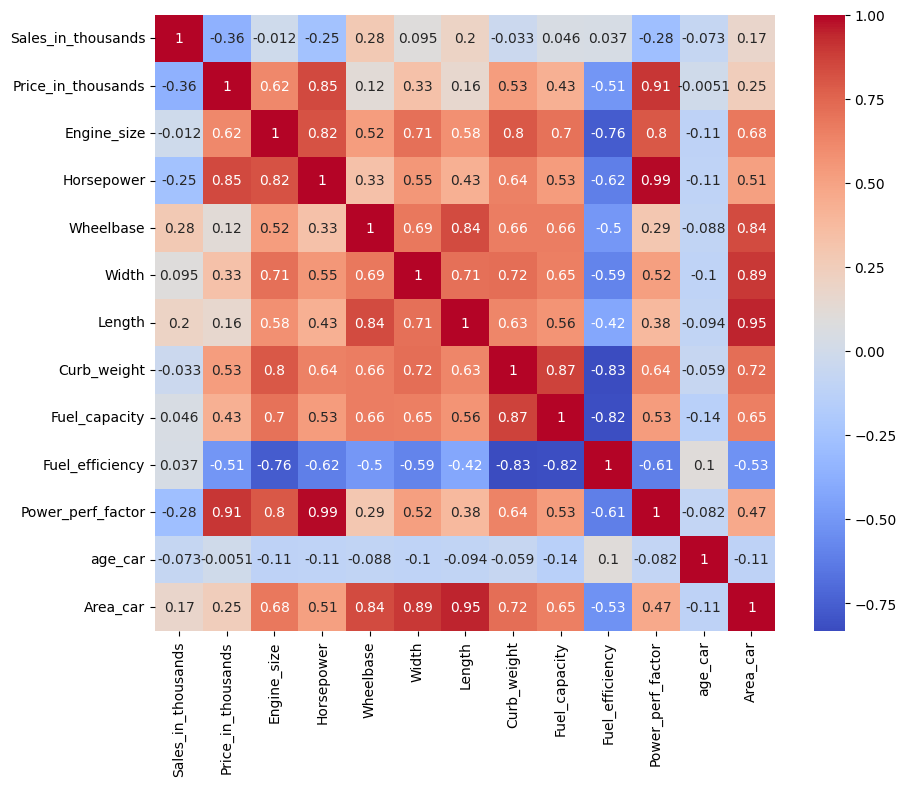

In [191]:
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [192]:
# # # Autocorrelation ( Residual/Error Term -> Predicted value - actual Value)
# # #Durbin watson Test
# # H0 - There is no correlation among the residual
# # Ha - There is correlation
# CI- 95%, Alpha - 0.05
# Decision : If p value > =0.05 - accept null
#           : if p value < 0.05 - reject null

In [193]:
# normality
# plt.figure(figsize=(5,3))
# sns.histplot(final_data0["Sales_in_thousands"])
# plt.show()

In [194]:
# # shapiro Test <5000 ; 5000> Jarque bera Test > 5000
# Null -  Data is normal
# Alternative - Data is not normal

In [195]:
from scipy import stats
stats.shapiro(final_data0["Sales_in_thousands"])

ShapiroResult(statistic=0.7552343010902405, pvalue=6.811628474131691e-15)

In [196]:
# Left skewed / Right skewed
# Positive and negative

ShapiroResult(statistic=0.9831064939498901, pvalue=0.05211067572236061)


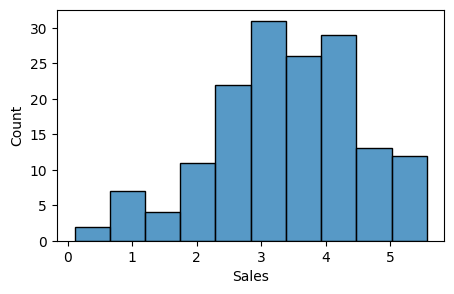

In [197]:
# final_data0["Sales"]=(final_data0["Sales_in_thousands"])**(1/4)
final_data0["Sales"]=np.log1p(final_data0["Sales_in_thousands"])

print(stats.shapiro(final_data0["Sales"]))
plt.figure(figsize=(5,3))
sns.histplot(final_data0["Sales"])
plt.show()

In [198]:
np.log(0.056+1)

0.054488185284069776

In [199]:
np.log1p(0.056)

0.054488185284069734

In [200]:
final_data0.dtypes

Sales_in_thousands         float64
Price_in_thousands         float64
Engine_size                float64
Horsepower                 float64
Wheelbase                  float64
Width                      float64
Length                     float64
Curb_weight                float64
Fuel_capacity              float64
Fuel_efficiency            float64
Power_perf_factor          float64
age_car                      int64
Area_car                   float64
Manufacturer_Audi            int64
Manufacturer_BMW             int64
Manufacturer_Buick           int64
Manufacturer_Cadillac        int64
Manufacturer_Chevrolet       int64
Manufacturer_Chrysler        int64
Manufacturer_Dodge           int64
Manufacturer_Ford            int64
Manufacturer_Honda           int64
Manufacturer_Hyundai         int64
Manufacturer_Infiniti        int64
Manufacturer_Jaguar          int64
Manufacturer_Jeep            int64
Manufacturer_Lexus           int64
Manufacturer_Lincoln         int64
Manufacturer_Mercede

In [201]:
y=final_data0["Sales"]

x=final_data0[['Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor', 'age_car', 'Area_car',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger']]

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=88)


In [204]:
x_train.head(2)

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
55,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,47.389531,...,0,0,0,0,0,0,0,0,0,0
104,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0,71.171664,...,0,0,0,0,0,0,0,0,0,0


In [205]:
x_train.shape

(109, 42)

In [206]:
x_test.shape

(48, 42)

In [207]:
import statsmodels.api as sm
x_train1=x_train[['Price_in_thousands',
                  'Engine_size',
       'Wheelbase',
       'Fuel_efficiency',
       'Vehicle_type_Passenger']]
x_train1=sm.add_constant(x_train1)
model=sm.OLS(y_train, x_train1)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     20.05
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           6.44e-14
Time:                        06:55:03   Log-Likelihood:                -131.41
No. Observations:                 109   AIC:                             274.8
Df Residuals:                     103   BIC:                             291.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [ ]:
y=-0.0528*Price_in_thousands+0.3265*Engine_size+..... -46.0990

In [91]:
x_train1.head(2)

,const,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
55,1.0,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,...,0,0,0,0,0,0,0,0,0,0
104,1.0,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# SKlearn Model

In [208]:
y=final_data0["Sales"]

x=final_data0[['Price_in_thousands',
                  'Engine_size',
       'Wheelbase',
       'Fuel_efficiency',
       'Vehicle_type_Passenger']]

In [209]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=88)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
line=LinearRegression()  # Model object

In [212]:
line.fit(x_train, y_train)

LinearRegression()

In [213]:
line.coef_

array([-0.05550874,  0.3891395 ,  0.03973065,  0.07772577, -0.50376232])

In [214]:
x_train.columns

Index(['Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency',
       'Vehicle_type_Passenger'],
      dtype='object')

In [217]:
line.intercept_

-2.0289813209361065

In [218]:
# dir(line)

In [219]:
# model evaluation

In [220]:
pred_train=line.predict(x_train)

In [221]:
pred_train

array([4.73103071, 3.87982349, 3.36842762, 3.68476745, 2.63168467,
       0.1593991 , 2.83137188, 3.05642068, 3.26877029, 3.55841563,
       3.23560037, 2.98558984, 3.22960268, 3.60764611, 2.76669525,
       3.799048  , 3.88653459, 4.36486846, 2.44030102, 2.78828233,
       3.85601987, 3.32898581, 3.42359917, 2.08728672, 4.45228303,
       4.6828333 , 3.40681179, 2.1938104 , 3.36868601, 3.45745992,
       3.95057332, 3.64306399, 3.66897176, 1.71053042, 1.7819047 ,
       4.14402442, 3.96967   , 3.01101285, 3.68090014, 0.55295924,
       4.23060272, 3.50093819, 3.63257533, 3.59820269, 3.49272631,
       3.70891445, 5.00082216, 3.81809461, 3.24508308, 3.72681136,
       3.47349155, 4.36966172, 3.98597481, 3.81560152, 1.73111187,
       4.27391956, 3.70560554, 2.82822017, 3.8978124 , 3.31685868,
       2.91342849, 3.17133247, 3.22142373, 3.62369031, 3.21418378,
       3.89002168, 3.8392174 , 3.75425957, 3.67814034, 3.73682137,
       3.74246035, 3.32429818, 3.82585934, 4.21462788, 3.62922

In [222]:
y_train

55     5.401100
104    3.343144
36     1.746413
109    3.677667
98     2.533062
         ...   
62     3.742041
101    3.776043
148    2.357925
106    4.010202
32     2.671525
Name: Sales, Length: 109, dtype: float64

In [223]:
MSE=np.mean((pred_train-y_train)**(2))
MSE

0.6526720719419923

In [224]:
pred_test=line.predict(x_test)


In [225]:
MSE_test=np.mean((pred_test-y_test)**(2))
MSE_test

0.7687773739043505

In [226]:
# RMSE- Root mean Squared Error
train_rmse=np.sqrt(np.mean((pred_train-y_train)**(2)))
test_rmse=np.sqrt(np.mean((pred_test-y_test)**(2)))
print(f"Train RMSE {train_rmse}\nTest RMSE {test_rmse}")

Train RMSE 0.8078812239073219
Test RMSE 0.8767995061040754


In [227]:
#MAE- Mean Absolute Error
mae_trn=np.mean(abs(pred_train-y_train))
mae_tst=np.mean(abs(pred_test-y_test))
print(f"Train mae {mae_trn}\nTest mae {mae_tst}")

Train mae 0.6212270001128521
Test mae 0.6809916223388436


In [229]:
# MAPE- mean absolute percentage error
mape_trn=np.mean(abs((pred_train-y_train)/y_train))
mape_tst=np.mean(abs((pred_test-y_test)/y_test))
print(f"Train mape {mape_trn}\nTest mape {mape_tst}")

Train mape 0.2656867984661559
Test mape 0.7276247594230631


In [230]:
# # Reason for over fitting
# 1- data is too small
# 2. training data contains irrelavant information , noisy data
# 3. model is very complex ( complexity of model is very high)

In [231]:
# How to avoid overfitting

In [236]:
or_train=np.expm1(y_train)
pr_train=np.expm1(pred_train)

<Axes: >

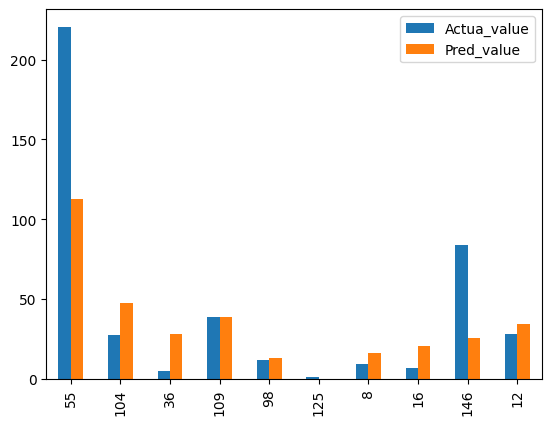

In [240]:
pd.DataFrame({"Actua_value":or_train,"Pred_value":pr_train}).head(10).plot(kind="bar")

In [241]:
x_train.head(2)

,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Passenger
55,12.050,2.5,117.5,23.0,0
104,26.399,3.3,112.2,21.0,0


In [245]:
new_data=pd.DataFrame({"Price_in_thousands":[30, 30],
                       "Engine_size":[3,3],
                       "Wheelbase":[116,116],
                       "Fuel_efficiency":[24,24],
                       "Vehicle_type_Passenger":[1,0]})
np.expm1(line.predict(new_data))

array([30.29899893, 50.79783902])